## Import das bibliotecas

In [1003]:
import gdown
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from scipy import stats
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

## Import dos dados

In [1004]:
url = "https://drive.google.com/file/d/1JJ0Q_Q_sOWH9Z4tTMjRIHlbFVkPtjr9V/view?usp=sharing"
output = 'cars_train.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)
df = pd.read_csv('cars_train.csv', encoding='utf-16', sep ='\t')

Downloading...
From: https://drive.google.com/uc?id=1JJ0Q_Q_sOWH9Z4tTMjRIHlbFVkPtjr9V
To: /content/cars_train.csv
100%|██████████| 16.6M/16.6M [00:00<00:00, 187MB/s]


In [1005]:
url = "https://drive.google.com/file/d/14Nq5S5qr37rLxY5yWNiTLV8L09oxx9CZ/view?usp=sharing"
output = 'cars_test.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)
df_test = pd.read_csv('cars_test.csv', encoding='utf-16',sep ='\t')

Downloading...
From: https://drive.google.com/uc?id=14Nq5S5qr37rLxY5yWNiTLV8L09oxx9CZ
To: /content/cars_test.csv
100%|██████████| 5.19M/5.19M [00:00<00:00, 173MB/s]


In [1006]:
data = [df, df_test]
df = pd.concat(data)

In [1007]:
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [1008]:
df.shape

(39446, 29)

## Análise exploratória de dados (EDA)

### Tipo de dados e valores nulos

In [1009]:
#Verificação sobre o tipo dos dados de cada feature/coluna
df.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_único_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fábrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

In [1010]:
#Quantidade de valores nulos em cada coluna/feature
df.isnull().sum()

id                             0
num_fotos                    237
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca          10216
veiculo_único_dono         25548
revisoes_concessionaria    27207
ipva_pago                  13223
veiculo_licenciado         18196
garantia_de_fábrica        33658
revisoes_dentro_agenda     31543
veiculo_alienado           39446
preco                       9862
dtype: int64

<Axes: >

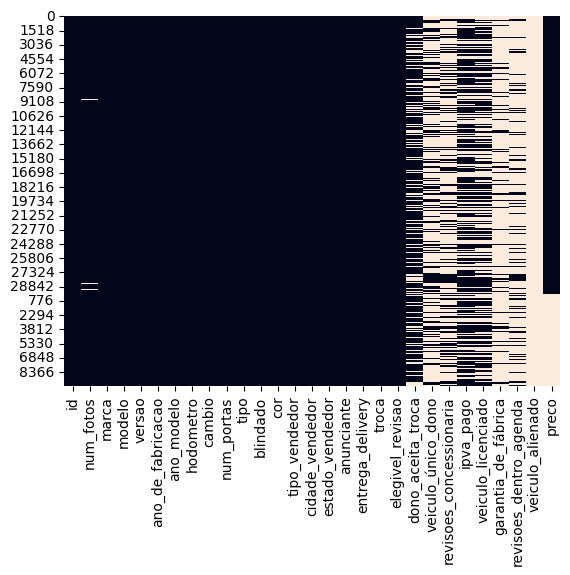

In [1011]:
#Representação visual da quantidade de valores nulos em cada coluna/feature
sns.heatmap(df.isnull(), cbar=False)

### Análise de features

In [1012]:
#Deletado porque todos são nulos.
df.drop('veiculo_alienado', axis=1, inplace= True)

In [1013]:
#Informações sobre os valores da coluna 'num_fotos'
df['num_fotos'].value_counts()

8.0     25846
15.0     3725
16.0     2980
14.0     2412
17.0     1300
9.0       999
13.0      960
20.0      369
18.0      315
12.0      209
19.0       57
11.0       26
21.0        8
10.0        3
Name: num_fotos, dtype: int64

In [1014]:
#Substituição dos valores nulos por 0 e mudança do tipo para inteiro.
df['num_fotos'].replace(np.nan, 0, inplace=True)
df['num_fotos'] = df['num_fotos'].astype('int64')

#### Variáveis Categóricas

In [1015]:
#Informações sobre quantidade de veículo de cada marca
df['marca'].value_counts()

VOLKSWAGEN       6140
CHEVROLET        4020
TOYOTA           2882
HYUNDAI          2740
JEEP             2667
FIAT             2523
BMW              2375
AUDI             2291
PEUGEOT          2246
HONDA            2097
MERCEDES-BENZ    1501
FORD             1445
MITSUBISHI       1148
LAND ROVER       1027
RENAULT           711
NISSAN            583
KIA               565
PORSCHE           470
VOLVO             363
CITROËN           248
TROLLER           223
RAM               221
JAGUAR            212
CHERY             202
MINI              182
LEXUS              91
SUBARU             54
SUZUKI             51
DODGE              47
CHRYSLER           40
SSANGYONG          20
SMART              16
MASERATI           12
ALFA ROMEO         10
LIFAN              10
JAC                 5
EFFA                2
IVECO               2
FERRARI             2
BRM                 1
LAMBORGHINI         1
Name: marca, dtype: int64

Text(0.5, 0, 'Marca')

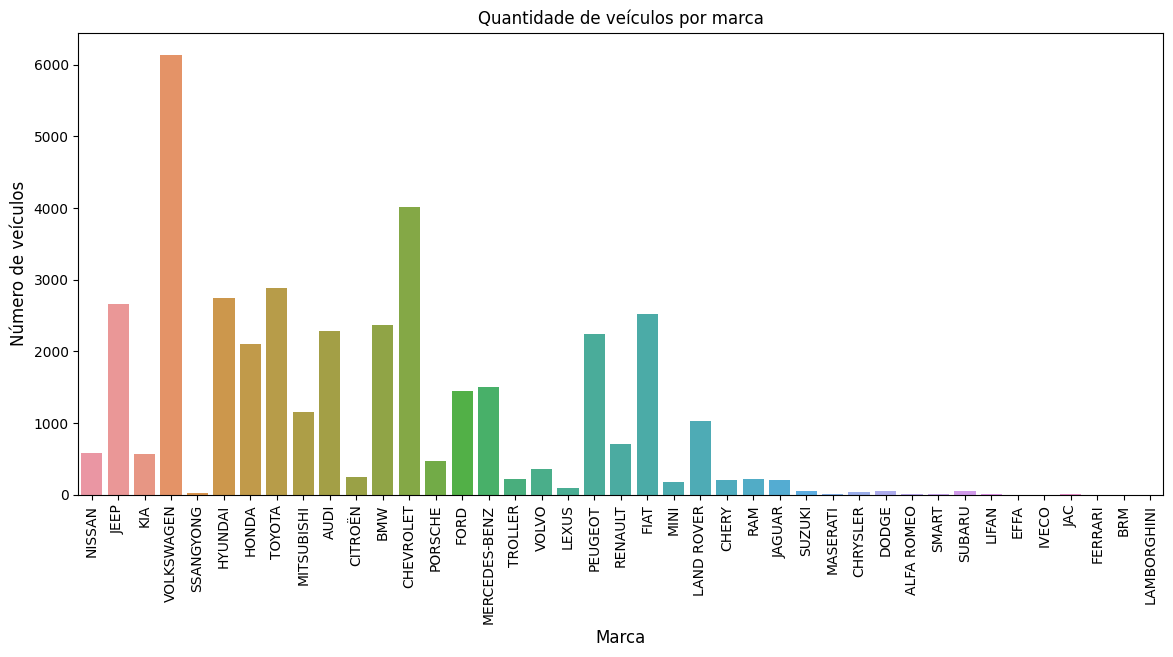

In [1016]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x="marca", data=df)
plt.title('Quantidade de veículos por marca', fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel('Número de veículos', fontsize = 12)
plt.xlabel('Marca', fontsize = 12)

Volkswagen e Chevrolet destacam-se com o maior número de veículos.

Text(0, 0.5, 'Preço')

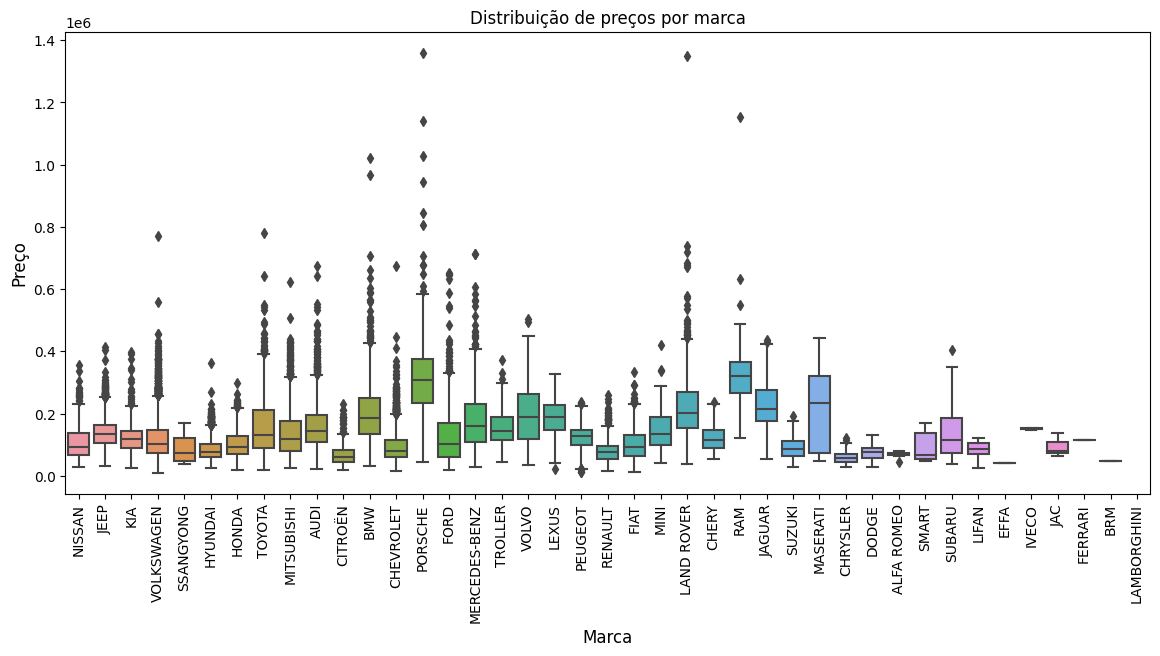

In [1017]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x='marca', y ='preco', data=df)
plt.xticks(rotation=90)
plt.title('Distribuição de preços por marca', fontsize = 12)
plt.xlabel('Marca', fontsize = 12)
plt.ylabel('Preço', fontsize = 12)

Marcas como: Porshe, BMW, Jaguar, RAM, entre outras, se destacam pelos seus elevados preços.

In [1018]:
df['modelo'].value_counts()

COMPASS    1967
2008       1924
Q3         1213
TORO       1179
COROLLA    1168
           ... 
ML 320        1
ES 350        1
STILO         1
RS7           1
M 140i        1
Name: modelo, Length: 473, dtype: int64

In [1019]:
#Exclusão do modelo da base, pois são muitos valores distintos
df.drop('modelo', axis=1, inplace= True)

In [1020]:
#Informação "duplicada" pois já existe 'ano_de_fabricação'
df.drop('ano_modelo', axis=1, inplace= True)

In [1021]:
df['cambio'].value_counts()

Automática               30073
Manual                    6631
CVT                       2391
Automatizada               192
Automatizada DCT            71
Semi-automática             56
Automática Sequencial       32
Name: cambio, dtype: int64

<Axes: xlabel='preco', ylabel='cambio'>

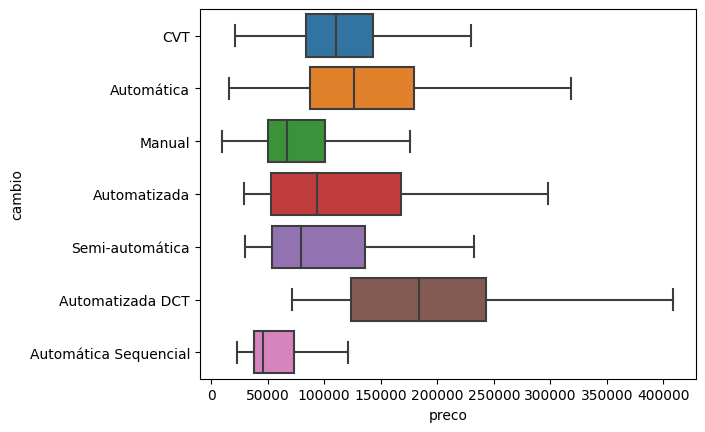

In [1022]:
sns.boxplot(x='preco', y ='cambio', data=df, showfliers = False)

Com uma sobreposição moderada, o 'cambio' poderia ser considerado uma boa variável preditiva, isso pode ser confirmado através de um teste ANOVA (feature categórica X target numérico)

In [1023]:
df['tipo'].value_counts()

Sedã                    21910
Hatchback                6570
Picape                   6426
Utilitário esportivo     4458
Perua/SW                   37
Cupê                       34
Minivan                    10
Conversível                 1
Name: tipo, dtype: int64

<Axes: xlabel='tipo', ylabel='preco'>

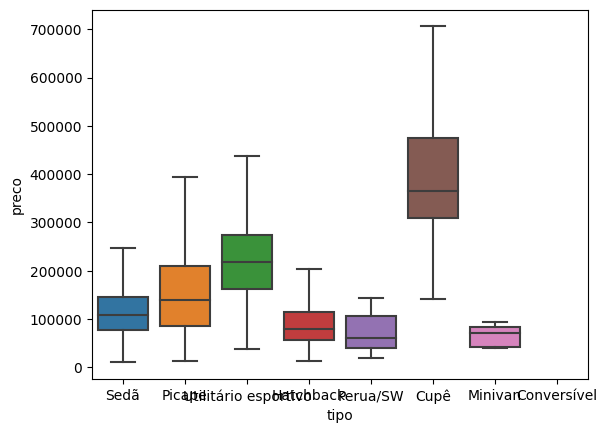

In [1024]:
sns.boxplot(x='tipo', y ='preco', data=df, showfliers = False)

Com uma sobreposição moderada, o 'tipo' poderia ser considerado uma boa variável preditiva, isso pode ser confirmado através de um teste ANOVA (feature categórica X target numérico)

In [1025]:
df['blindado'].value_counts()

N    39128
S      318
Name: blindado, dtype: int64

In [1026]:
#Substituição dos valores em texto por números (encoding)
df['blindado'].replace('N' , 0, inplace=True)
df['blindado'].replace('S', 1, inplace=True)
df['blindado'].value_counts()

0    39128
1      318
Name: blindado, dtype: int64

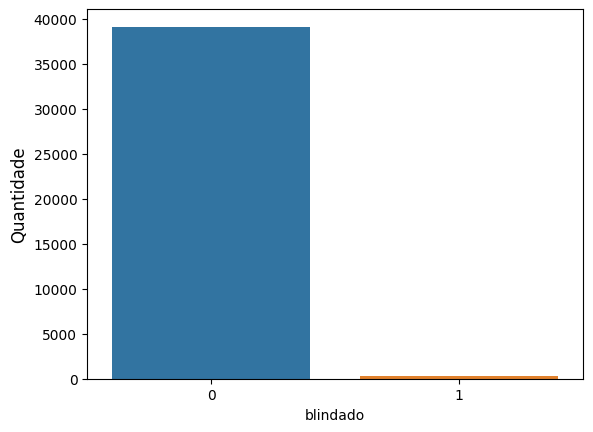

In [1027]:
#0 representa sem blindagem, 1 representa com blindagem
sns.countplot(x="blindado", data=df)
plt.ylabel('Quantidade', fontsize = 12)
plt.show()

Apenas uma pequena minoria dos carros são blindados.

In [1028]:
df['cor'].value_counts()

Branco      27919
Preto        6985
Prata        2359
Cinza        2174
Dourado         6
Verde           1
Vermelho        1
Azul            1
Name: cor, dtype: int64

In [1029]:
df['tipo_vendedor'].value_counts()

PF    23857
PJ    15589
Name: tipo_vendedor, dtype: int64

In [1030]:
#Substituição dos valores em texto por números (encoding)
df['tipo_vendedor'].replace('PF' , 0, inplace=True)
df['tipo_vendedor'].replace('PJ', 1, inplace=True)
df['tipo_vendedor'].value_counts()

0    23857
1    15589
Name: tipo_vendedor, dtype: int64

In [1031]:
df['cidade_vendedor'].value_counts()

São Paulo              8198
Rio de Janeiro         7739
Belo Horizonte         2925
Presidente Prudente    2022
Goiânia                1871
                       ... 
Palmital                  1
Quaraí                    1
Cianorte                  1
Arraial D'Ajuda           1
Balsas                    1
Name: cidade_vendedor, Length: 648, dtype: int64

In [1032]:
df['estado_vendedor'].value_counts()

São Paulo (SP)              21794
Rio de Janeiro (RJ)          3384
Paraná (PR)                  3380
Santa Catarina (SC)          3119
Minas Gerais (MG)            2350
Rio Grande do Sul (RS)       2191
Goiás (GO)                   1043
Bahia (BA)                    827
Pernambuco (PE)               411
Alagoas (AL)                  171
Paraíba (PB)                  147
Rio Grande do Norte (RN)      119
Pará (PA)                     107
Ceará (CE)                     87
Amazonas (AM)                  66
Mato Grosso (MT)               48
Mato Grosso do Sul (MS)        46
Acre (AC)                      40
Tocantins (TO)                 34
Sergipe (SE)                   29
Espírito Santo (ES)            29
Piauí (PI)                      9
Maranhão (MA)                   7
Rondônia (RO)                   5
Roraima (RR)                    3
Name: estado_vendedor, dtype: int64

Text(0.5, 0, 'Estado')

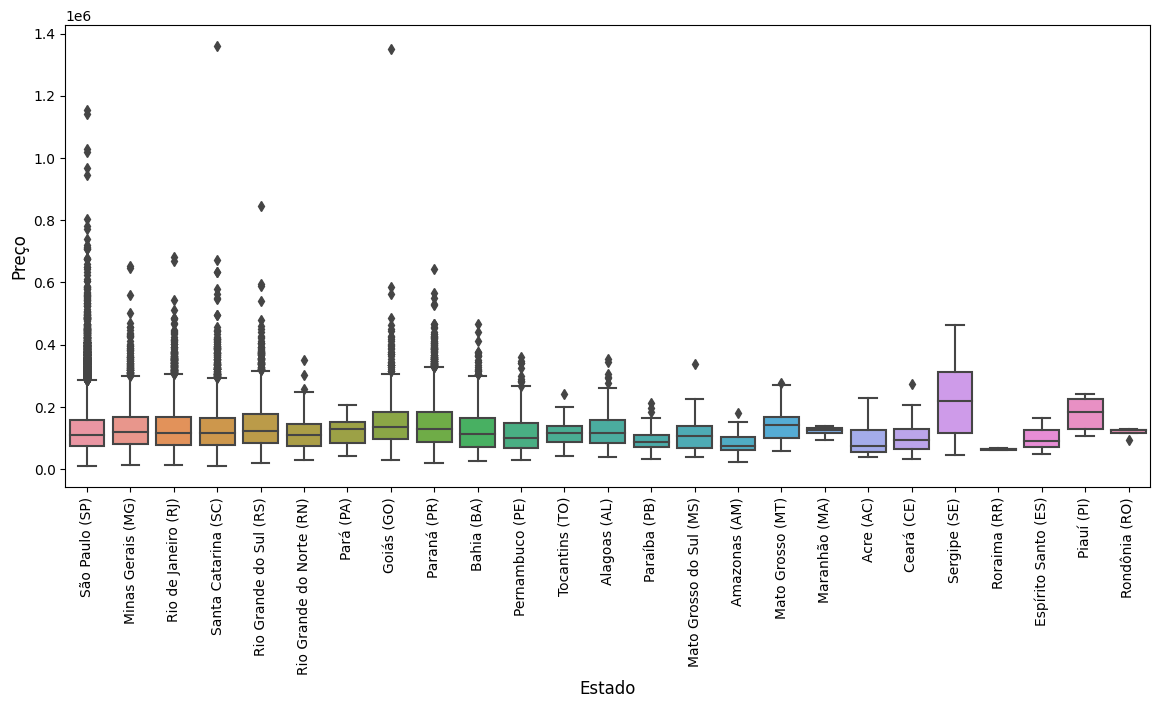

In [1033]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x="estado_vendedor", y="preco", data=df)
plt.xticks(rotation=90)
plt.ylabel('Preço', fontsize = 12)
plt.xlabel('Estado', fontsize = 12)

São Paulo é o estado com maior quantidade de Outliers, inclusive comparando com as distribuições de outros estados, o que confirma que boa parte dos veículos mais caros estão nesse estado.

<Axes: xlabel='preco', ylabel='estado_vendedor'>

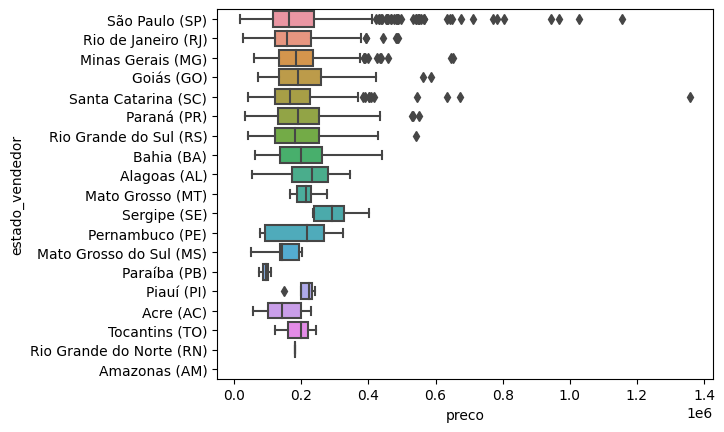

In [1034]:
#Gráfico da distribuição dos preços de uma Picape de Câmbio Automático por Estado
sns.boxplot(x="preco", y="estado_vendedor", data=df[(df['cambio'] == 'Automática') & (df['tipo'] == 'Picape')], orient='h')

In [1035]:
df[(df['cambio'] == 'Automática') & (df['tipo'] == 'Picape')].groupby('estado_vendedor')['preco'].agg(['mean','count']).sort_values(by='mean', ascending=False)

,mean,count
estado_vendedor,,
Sergipe (SE),298195.309673,5
Alagoas (AL),218671.542780,12
Mato Grosso (MT),214102.315642,6
Piauí (PI),208181.077756,4
Goiás (GO),208153.658437,102
Bahia (BA),206364.799217,68
Paraná (PR),198384.949644,348
Minas Gerais (MG),195702.914796,211
Rio Grande do Sul (RS),195251.763134,198


Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
R.: Do ponto de vista do cliente comprador, que busca o menor preço, no estado da Paraíba tem preços mais acessíveis, porém, pouquíssimas unidades. Levando em conta esse ponto, um bom estado seria o do Rio de Janeiro, com mais unidades de veículos que atendem aos requisitos.

In [1036]:
df['anunciante'].value_counts()

Pessoa Física                       23949
Loja                                13182
Concessionária                       2310
Acessórios e serviços para autos        5
Name: anunciante, dtype: int64

In [1037]:
df['entrega_delivery'].value_counts()

False    31508
True      7938
Name: entrega_delivery, dtype: int64

In [1038]:
#Substituição dos valores em texto por números (encoding)
df['entrega_delivery'].replace(False , 0, inplace=True)
df['entrega_delivery'].replace(True, 1, inplace=True)
df['entrega_delivery'].value_counts()

0    31508
1     7938
Name: entrega_delivery, dtype: int64

In [1039]:
df['troca'].value_counts()

False    32740
True      6706
Name: troca, dtype: int64

In [1040]:
#Substituição dos valores em texto por números (encoding)
df['troca'].replace(False , 0, inplace=True)
df['troca'].replace(True, 1, inplace=True)
df['troca'].value_counts()

0    32740
1     6706
Name: troca, dtype: int64

In [1041]:
df['elegivel_revisao'].value_counts()

False    39446
Name: elegivel_revisao, dtype: int64

In [1042]:
#Exclusão devido a existência de apenas uma categoria
df.drop('elegivel_revisao', axis=1, inplace= True)

In [1043]:
df['dono_aceita_troca'].value_counts()

Aceita troca    29230
Name: dono_aceita_troca, dtype: int64

In [1044]:
#Substituição dos valores em texto por números (encoding)
df['dono_aceita_troca'].replace(np.nan, 0, inplace=True)
df['dono_aceita_troca'].replace('Aceita troca', 1, inplace=True)
df['dono_aceita_troca'].value_counts()

1    29230
0    10216
Name: dono_aceita_troca, dtype: int64

In [1045]:
df['veiculo_único_dono'].value_counts()

Único dono    13898
Name: veiculo_único_dono, dtype: int64

In [1046]:
#Substituição dos valores em texto por números (encoding)
df['veiculo_único_dono'].replace(np.nan, 0, inplace=True)
df['veiculo_único_dono'].replace('Único dono', 1, inplace=True)
df['veiculo_único_dono'].value_counts()

0    25548
1    13898
Name: veiculo_único_dono, dtype: int64

In [1047]:
df['revisoes_concessionaria'].value_counts()

Todas as revisões feitas pela concessionária    12239
Name: revisoes_concessionaria, dtype: int64

In [1048]:
#Substituição dos valores em texto por números (encoding)
df['revisoes_concessionaria'].replace(np.nan, 0, inplace=True)
df['revisoes_concessionaria'].replace('Todas as revisões feitas pela concessionária', 1, inplace=True)
df['revisoes_concessionaria'].value_counts()

0    27207
1    12239
Name: revisoes_concessionaria, dtype: int64

In [1049]:
df['ipva_pago'].value_counts()

IPVA pago    26223
Name: ipva_pago, dtype: int64

In [1050]:
#Substituição dos valores em texto por números (encoding)
df['ipva_pago'].replace(np.nan, 0, inplace=True)
df['ipva_pago'].replace('IPVA pago', 1, inplace=True)
df['ipva_pago'].value_counts()

1    26223
0    13223
Name: ipva_pago, dtype: int64

In [1051]:
df['veiculo_licenciado'].value_counts()

Licenciado    21250
Name: veiculo_licenciado, dtype: int64

In [1052]:
#Substituição dos valores em texto por números (encoding)
df['veiculo_licenciado'].replace(np.nan, 0, inplace=True)
df['veiculo_licenciado'].replace('Licenciado', 1, inplace=True)
df['veiculo_licenciado'].value_counts()

1    21250
0    18196
Name: veiculo_licenciado, dtype: int64

In [1053]:
df['garantia_de_fábrica'].value_counts()

Garantia de fábrica    5788
Name: garantia_de_fábrica, dtype: int64

In [1054]:
#Substituição dos valores em texto por números (encoding)
df['garantia_de_fábrica'].replace(np.nan, 0, inplace=True)
df['garantia_de_fábrica'].replace('Garantia de fábrica', 1, inplace=True)
df['garantia_de_fábrica'].value_counts()

0    33658
1     5788
Name: garantia_de_fábrica, dtype: int64

<Axes: xlabel='preco', ylabel='estado_vendedor'>

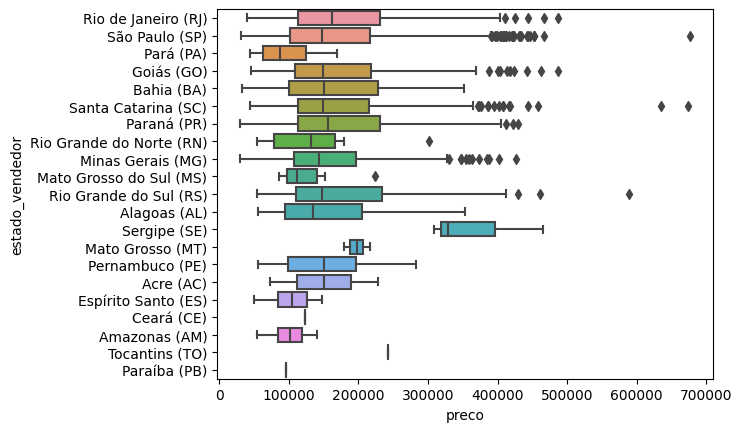

In [1055]:
##Gráfico da distribuição dos preços de veículos com garantia de Fábrica por Estado
sns.boxplot(x="preco", y="estado_vendedor", data=df[df['garantia_de_fábrica'] == 1], orient ='h')

In [1056]:
#Cálculo da média de preço por Estado dos veículos que se adequam à condição de estarem em garantia de fábrica.
df[df['garantia_de_fábrica'] == 1].groupby('estado_vendedor')['preco'].agg(['mean','count']).sort_values(by='mean', ascending=False)

,mean,count
estado_vendedor,,
Sergipe (SE),367138.430255,3
Tocantins (TO),243002.217032,1
Mato Grosso (MT),197657.066561,2
Rio de Janeiro (RJ),179109.858403,412
Rio Grande do Sul (RS),176442.236455,281
Paraná (PR),175578.245503,389
Goiás (GO),174521.413156,186
Santa Catarina (SC),173798.439853,330
São Paulo (SP),166751.081004,2307


Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?
Os estados do Pará e do Amazonas são boas opções para se comprar veículos dentro da garantia, apresentando valores mais tímidos.

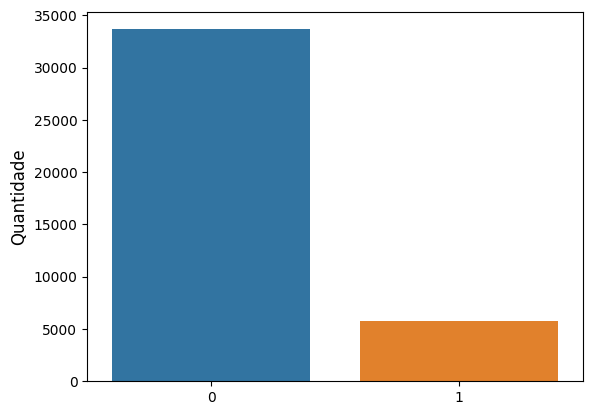

In [1057]:
# 0 representa o não e 1 representa o sim - Trocar as categorias por valores desejados.
sns.countplot(x="garantia_de_fábrica", data=df)
plt.ylabel('Quantidade', fontsize = 12)
plt.xlabel('')
plt.show()

In [1058]:
df['revisoes_dentro_agenda'].value_counts()

Todas as revisões feitas pela agenda do carro    7903
Name: revisoes_dentro_agenda, dtype: int64

In [1059]:
#Substituição dos valores em texto por números (encoding)
df['revisoes_dentro_agenda'].replace(np.nan, 0, inplace=True)
df['revisoes_dentro_agenda'].replace('Todas as revisões feitas pela agenda do carro', 1, inplace=True)
df['revisoes_dentro_agenda'].value_counts()

0    31543
1     7903
Name: revisoes_dentro_agenda, dtype: int64

#### Variáveis numéricas

In [1060]:
#Informações descritivas sobre os valores
df['preco'].describe().apply("{0:.1f}".format)

count      29584.0
mean      133023.9
std        81662.9
min         9870.0
25%        76571.8
50%       114355.8
75%       163679.6
max      1359812.9
Name: preco, dtype: object

Text(0.5, 1.0, 'Distribuição dos preços dos veículos')

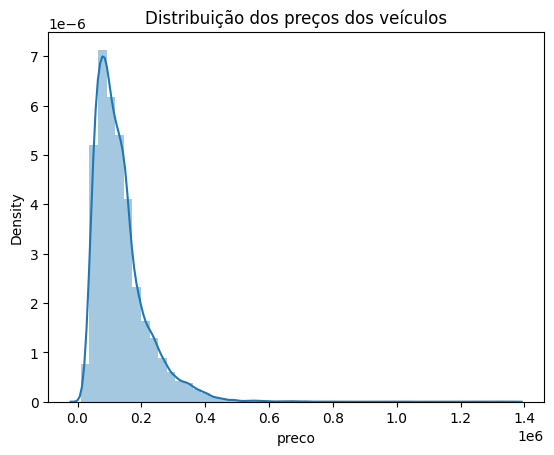

In [1061]:
#Verificação da distribuição dos preços
sns.distplot(df['preco'])
plt.title('Distribuição dos preços dos veículos')

Marcas Populares são: ['ALFA ROMEO', 'BRM', 'CHRYSLER', 'CITROËN', 'DODGE', 'EFFA', 'HYUNDAI', 'LIFAN', 'RENAULT', 'SSANGYONG']


<Axes: xlabel='preco', ylabel='estado_vendedor'>

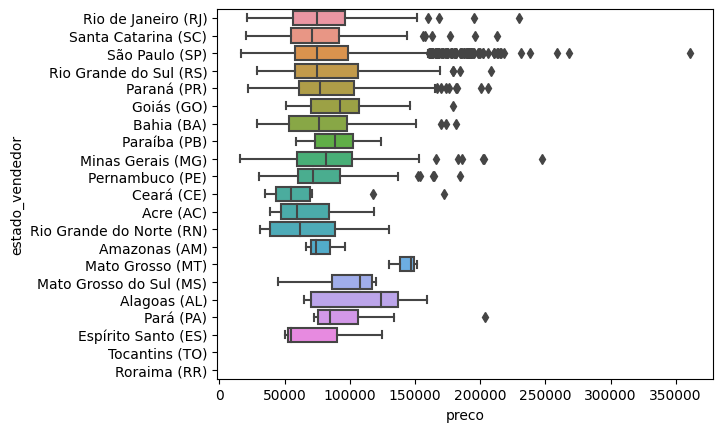

In [1062]:
# Verificação do conceito de carro popular construída a partir dos próprios dados.
# Considerado marca popular aquela que possui, na média, valores inferiores a 85000.

preco_medio_marca = df[['marca', 'preco']].groupby('marca', as_index = False).mean()

marca_popular = []
for index in range(len(preco_medio_marca)):
    if preco_medio_marca.iloc[index, 1] <= 85000:
        marca_popular.append(preco_medio_marca.iloc[index, 0])
print('Marcas Populares são:', marca_popular)


filtro_popular = df['marca'].isin(marca_popular)
sns.boxplot(x="preco", y="estado_vendedor", data=df[filtro_popular], orient='h')

In [1063]:
df[filtro_popular].groupby('estado_vendedor')['preco'].agg(['mean','count']).sort_values(by='mean', ascending=False)

,mean,count
estado_vendedor,,
Mato Grosso (MT),142855.497934,3
Alagoas (AL),109004.876775,7
Pará (PA),103309.419312,8
Mato Grosso do Sul (MS),95344.168774,5
Goiás (GO),92816.167048,44
Paraíba (PB),88743.712785,10
Rio Grande do Sul (RS),84573.862549,127
Minas Gerais (MG),84373.825458,138
Paraná (PR),83862.745940,216


Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?

No estado de São Paulo há bastante ouliers, indicando que pode-se encontrar compradores dispostos a pagar mais, o que é melhor para o hipotético cliente, que lucaria mais com as vendas. O Estado de Goiás se destaca pela quantidade de unidades disponíveis e pelo alto valor.

In [1064]:
#Informações descritivas sobre os valores
df['hodometro'].describe().apply("{0:.1f}".format)

count     39446.0
mean      58382.2
std       32542.8
min         100.0
25%       31235.2
50%       57244.5
75%       81925.8
max      390065.0
Name: hodometro, dtype: object

Text(0.5, 1.0, 'Distribuição do hodometro dos veículos')

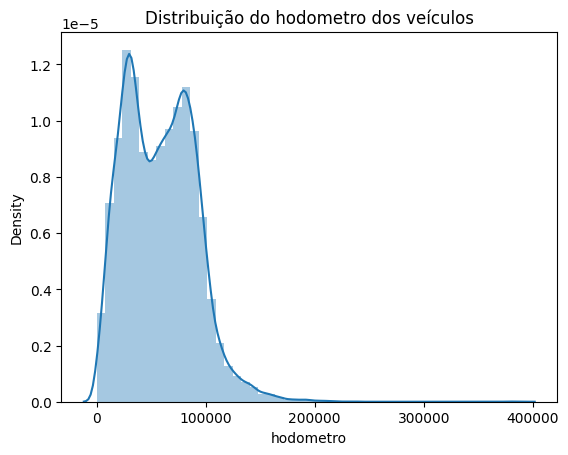

In [1065]:
#Verificação da distribuição da distancia percorrida (hodometro)
sns.distplot(df['hodometro'])
plt.title('Distribuição do hodometro dos veículos')

<Axes: xlabel='hodometro', ylabel='preco'>

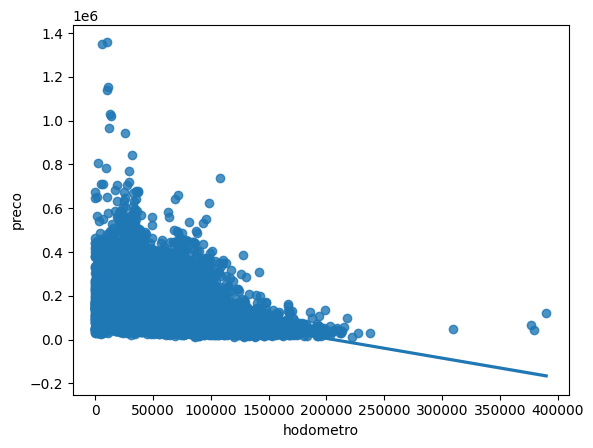

In [1066]:
#Gráfico de dispersão com linha de tendencia
sns.regplot(x="hodometro", y="preco", data=df)

O gráfico demonstra que a medida que a marcação do hodometro avança, o valor do preço tende a decair.

In [1067]:
#Criação da feature numérica 'idade' ao invés de utilizar o ano de fabricação.
df['idade'] = 2023 - df['ano_de_fabricacao']
df.drop('ano_de_fabricacao', axis=1, inplace= True)

<Axes: xlabel='idade', ylabel='preco'>

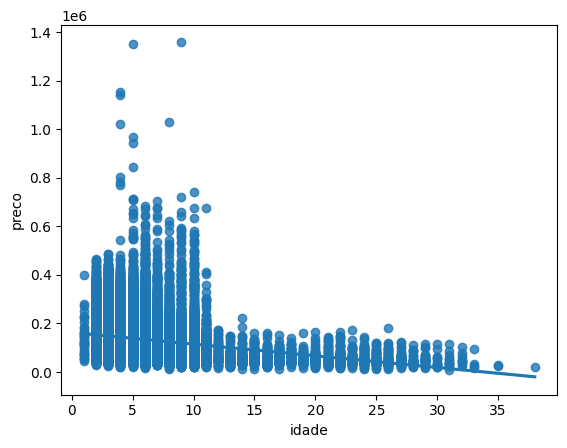

In [1068]:
#Gráfico de dispersão com linha de tendencia
sns.regplot(x="idade", y="preco", data=df)

Tem-se o mesmo raciocínio do hodometro.

## Pré Processamento de dados

In [1069]:
#Retirada da 'potencia' do motor do veículo a partir da feature 'versão'
distincao_eletrico = []
for elemento in df['versao']:
  if 'ELÉTRICO' in elemento:
   distincao_eletrico.append('ELÉTRICO')
  else:
   distincao_eletrico.append(elemento)

df['distincao_eletrico'] = distincao_eletrico

df['distincao_eletrico'] = df['distincao_eletrico'].str.split().str[0]

potencia  = []
for elemento in df['distincao_eletrico']:
  try:
    potencia.append(float(elemento))
  except:
    potencia.append("Elétrico")

df['potencia'] = potencia
df.drop(['distincao_eletrico','versao'], axis=1, inplace= True)

#Criação de uma feature que identifique carros à combustão (0) e elétricos (1)
eletrico_combustao = []

for elemento in df['potencia']:
  if elemento == 'Elétrico':
    eletrico_combustao.append(1)
  else:
    eletrico_combustao.append(0)

df['eletrico_combustao'] = eletrico_combustao

df['potencia'] = df['potencia'].replace('Elétrico', 0)

<Axes: xlabel='potencia', ylabel='preco'>

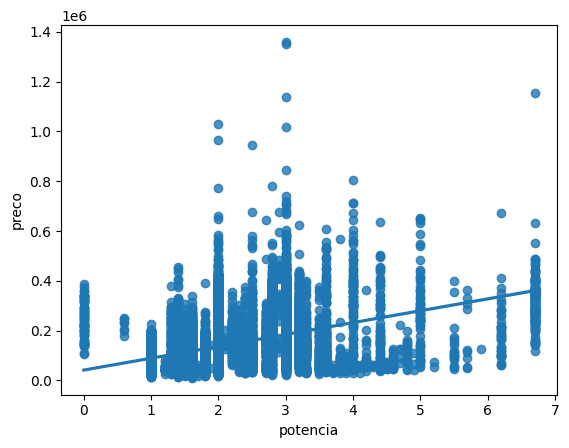

In [1070]:
#Gráfico de dispersão com linha de tendencia
sns.regplot(x="potencia", y="preco", data=df)

O gráfico demonstra que à medida que a potencia aumenta, o preço também se eleva.

In [1071]:
#Carros à combustão (0) e elétricos (1)
df['eletrico_combustao'].value_counts()

0    39353
1       93
Name: eletrico_combustao, dtype: int64

In [1072]:
df.shape

(39446, 26)

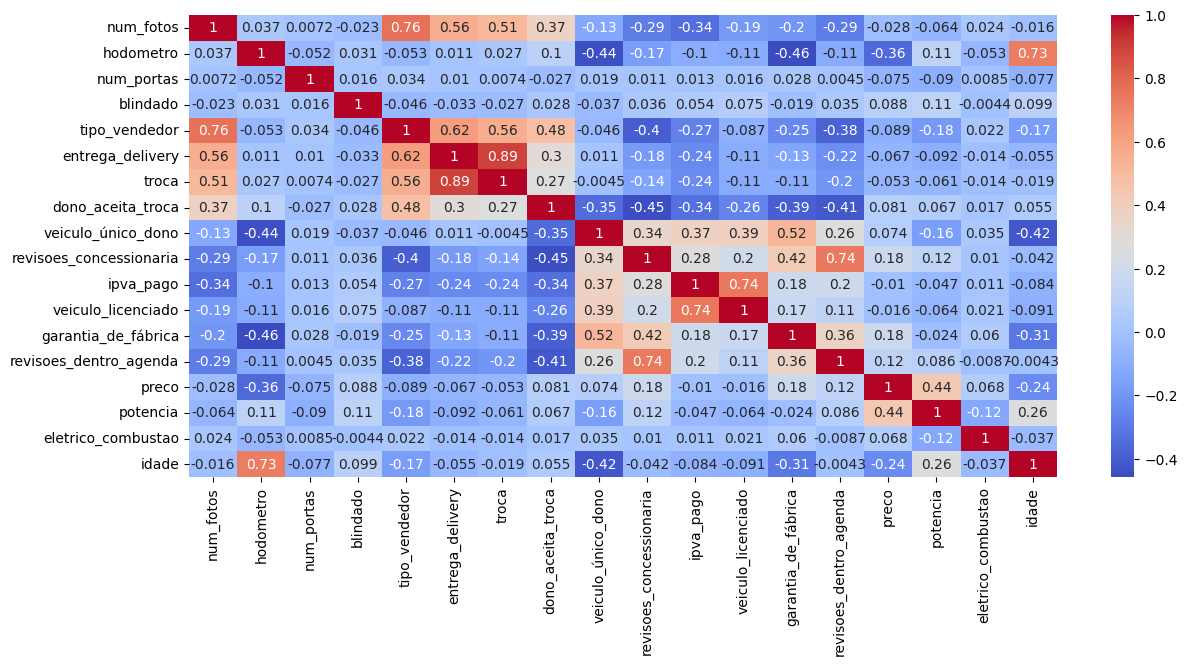

In [1073]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(df[['num_fotos','hodometro','num_portas','blindado','tipo_vendedor','entrega_delivery','troca',\
                'dono_aceita_troca','veiculo_único_dono','revisoes_concessionaria','ipva_pago',\
                'veiculo_licenciado','garantia_de_fábrica','revisoes_dentro_agenda','preco','potencia',\
                'eletrico_combustao','idade']]
               .corr(), annot=True, cmap='coolwarm')
plt.show()

Escolha inicial das variáveis preditoras, que tem correlação relativamente significativa com 'preco': 'idade','potencia','garantia_de_fábrica' e  'hodometro'

<Axes: xlabel='preco'>

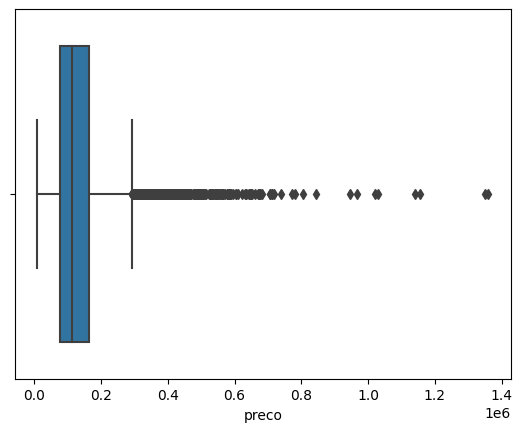

In [1074]:
#Conferindo a distribuição dos preços para a verificação de um valor possível de identificação entre carros populares ou não.
sns.boxplot(x=df['preco'])

In [1075]:
#Modificação das marcas para apenas dois valores {0,1}, onde 0 representa as marcas cuja média de preço é infeior ou igual a 150 mil, caso contrário, 1.
preco_medio_marca = df[['marca', 'preco']].groupby('marca', as_index = False).mean()

class_1 = []
class_2 = []

for index in range(len(preco_medio_marca)):
    if preco_medio_marca.iloc[index, 1] <= 150000:
        class_1.append(preco_medio_marca.iloc[index, 0])
    else:
        class_2.append(preco_medio_marca.iloc[index, 0])

print('Marcas cuja a média de preço é menor ou igual a 150000: ', class_1)
print('Marcas cuja a média de preço é superior a 150000: ', class_2)

Marcas cuja a média de preço é menor ou igual a 150000:  ['ALFA ROMEO', 'BRM', 'CHERY', 'CHEVROLET', 'CHRYSLER', 'CITROËN', 'DODGE', 'EFFA', 'FERRARI', 'FIAT', 'FORD', 'HONDA', 'HYUNDAI', 'JAC', 'JEEP', 'KIA', 'LIFAN', 'MINI', 'MITSUBISHI', 'NISSAN', 'PEUGEOT', 'RENAULT', 'SMART', 'SSANGYONG', 'SUBARU', 'SUZUKI', 'TROLLER', 'VOLKSWAGEN']
Marcas cuja a média de preço é superior a 150000:  ['AUDI', 'BMW', 'IVECO', 'JAGUAR', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'MASERATI', 'MERCEDES-BENZ', 'PORSCHE', 'RAM', 'TOYOTA', 'VOLVO']


In [1076]:
marca_dados = df['marca']
nova_marca_dados = []

for elemento in marca_dados:
    if elemento in class_1:
        nova_marca_dados.append(0)
    else:
        nova_marca_dados.append(1)

df['marca'] = nova_marca_dados

In [1077]:
df.head()

,id,num_fotos,marca,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,...,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco,idade,potencia,eletrico_combustao
0,300716223898539419613863097469899222392,8,0,67772.0,CVT,4,Sedã,0,Branco,0,...,0,1,1,1,0,0,74732.590084,6,1.6,0
1,279639842134129588306469566150288644214,8,0,62979.0,Automática,4,Sedã,0,Branco,0,...,0,0,1,0,0,0,81965.332634,6,2.0,0
2,56414460810621048900295678236538171981,16,0,44070.0,Automática,4,Sedã,0,Preto,1,...,0,0,0,0,0,0,162824.814472,5,2.4,0
3,56862509826849933428086372390159405545,14,0,85357.0,Automática,4,Picape,0,Branco,1,...,0,0,1,1,0,0,123681.358857,10,2.0,0
4,338980975753200343894519909855598027197,8,0,71491.0,Automática,4,Utilitário esportivo,0,Preto,0,...,0,1,0,0,1,1,82419.763891,10,2.0,0


## Modelagem - Modelo de Regressão com Regression Tree

In [1085]:
'''
'Tipo' e 'Cambio' foram selecionados a partir da observação dos gráficos de Boxplot mostrados anteriormente,
sendo possível também a realização do teste ANOVA e constatação de um p-value que corrobore que as variáveis tem relação entre si.
'''

#Seleção das features
X = df[['marca','idade','potencia','garantia_de_fábrica','hodometro','tipo','cambio']]

#Enconding com variáveis dummy das features multicategorias escolhidas.
get_dummy_col = ['tipo','cambio']
X = pd.get_dummies(X, columns = get_dummy_col)
X.shape

(39446, 20)

In [1084]:
#Separação do target
y = df['preco']

In [1086]:
X_train, X_test, y_train, y_test = train_test_split(X.head(29584), y.head(29584), test_size=0.3, random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (20708, 20) Y_train.shape= (20708,)
X_test.shape= (8876, 20) Y_test.shape= (8876,)


In [1087]:
#Verificando o erro no conjunto de Treino, dividindo o mesmo como em um conjunto de Treino e Teste
from sklearn.tree import DecisionTreeRegressor

sklearn_dt = DecisionTreeRegressor(max_depth=8)
sklearn_dt.fit(X_train, y_train)
prediction = sklearn_dt.predict(X_test)

mse = mean_squared_error(y_test, prediction)
rmse = sqrt(mse)
print(rmse)

48405.1002447938


Aqui tem-se o resultado do algoritmo DecisionTreeRegressor, que é bastante utilizado em problemas de regressão. Diferentes algoritmos de regressão foram utilizados, tendo sido esse o que teve o melhor desempenho na estatística de erro RMSE, ou raíz do erro quadrático médio, que tem a mesma unidade da variável target (R$).

Agora, o algoritmo será treinado com todo o conjunto de treino e será predito os valores do conjunto de teste.

In [1091]:
#Separação dados de treino e teste

X_train = X.head(29584)
y_train = y.head(29584)
X_test = X.tail(9862)


sklearn_dt = DecisionTreeRegressor(max_depth=8)
sklearn_dt.fit(X_train, y_train)
prediction = sklearn_dt.predict(X_test)

In [1103]:
resultado = pd.DataFrame()
resultado['id'] = df['id'].tail(9862)
resultado['prediction'] = prediction

In [1104]:
resultado

,id,prediction
0,13518783164498355150900635905895481162,74108.490649
1,299896161723793383246777788797566040330,87514.481126
2,316180649972302128246133616457018378621,276038.376963
3,222527157104148385909188217274642813298,118562.106425
4,160460343059850745858546502614838368036,118562.106425
...,...,...
9857,270530958308663978454359593206239054667,76632.914744
9858,35444226755331218706378362485070904721,281897.116312
9859,151927592621490440610866139377092833936,98088.802927
9860,118047837484645467440786911677256539035,118562.106425
